In [3]:
import pandas as pd

df = pd.read_csv('Freelance Platform Projects.csv')
df.head()

,Title,Category Name,Experience,Sub Category Name,Currency,Budget,Location,Freelancer Preferred From,Type,Date Posted,Description,Duration,Client Registration Date,Client City,Client Country,Client Currency,Client Job Title
0,Google Apps Script for Gumroad API,Technology & Programming,Expert ($$$),Programming & Coding,GBP,400.0,remote,ALL,fixed_price,2023-04-09 10:00:51,I have a Google Sheet to list on Gumroad. They...,NaN,2017-07-03,Lyminge,United Kingdom,GBP,Digital Consultant
1,Simple Research on Stakeholder Mapping tool re...,Writing & Translation,Entry ($),Research Writing,USD,20.0,remote,ALL,fixed_price,2023-04-09 10:02:21,I need a full research on the available stake...,1 day or less,2020-11-04,Riyadh,Saudi Arabia,USD,NaN
2,3D Animation,Design,Entry ($),Animation,GBP,10.0,remote,ALL,fixed_price,2023-04-09 10:00:51,I need this same animation done but with diffe...,NaN,2011-07-07,Crystal Palace,United Kingdom,GBP,NaN
3,Logo needed for a boxer,Design,Intermediate ($$),Logo Design,GBP,65.0,remote,ALL,fixed_price,2023-04-09 10:00:51,Looking for a creative designer to create a Lo...,NaN,2016-06-09,Dubai,United Arab Emirates,USD,NaN
4,Junior SEO Required,Digital Marketing,Expert ($$$),SEO,GBP,300.0,remote_country,GB,fixed_price,2023-04-09 10:00:51,UK applicants only please (In-person meetings ...,Ongoing,2018-05-28,London,United Kingdom,GBP,Local Search Marketing Consultant


# EDA

In [4]:
df.shape 

(9843, 17)

In [5]:
df.columns.values

array(['Title', 'Category Name', 'Experience', 'Sub Category Name',
       'Currency', 'Budget', 'Location', 'Freelancer Preferred From',
       'Type', 'Date Posted', 'Description', 'Duration',
       'Client Registration Date', 'Client City', 'Client Country',
       'Client Currency', 'Client Job Title'], dtype=object)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9843 entries, 0 to 9842
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Title                      9843 non-null   object 
 1   Category Name              9843 non-null   object 
 2   Experience                 9843 non-null   object 
 3   Sub Category Name          9843 non-null   object 
 4   Currency                   9843 non-null   object 
 5   Budget                     9843 non-null   float64
 6   Location                   9843 non-null   object 
 7   Freelancer Preferred From  9843 non-null   object 
 8   Type                       9843 non-null   object 
 9   Date Posted                9843 non-null   object 
 10  Description                9843 non-null   object 
 11  Duration                   1297 non-null   object 
 12  Client Registration Date   9843 non-null   object 
 13  Client City                9843 non-null   objec

In [7]:
df.describe()

,Budget
count,9843.000000
mean,221.284872
std,1761.324573
min,0.000000
25%,30.000000
50%,80.000000
75%,150.000000
max,99999.000000


In [8]:
df.isnull().sum()

Title                           0
Category Name                   0
Experience                      0
Sub Category Name               0
Currency                        0
Budget                          0
Location                        0
Freelancer Preferred From       0
Type                            0
Date Posted                     0
Description                     0
Duration                     8546
Client Registration Date        0
Client City                     0
Client Country                  0
Client Currency                 0
Client Job Title             6119
dtype: int64

In [9]:
# mising Value column deleted 
newdf=df.dropna(axis=1)
print(df.shape)
print(newdf.shape)

(9843, 17)
(9843, 15)


In [10]:
newdf.columns

Index(['Title', 'Category Name', 'Experience', 'Sub Category Name', 'Currency',
       'Budget', 'Location', 'Freelancer Preferred From', 'Type',
       'Date Posted', 'Description', 'Client Registration Date', 'Client City',
       'Client Country', 'Client Currency'],
      dtype='object')

In [11]:
obj_col=newdf.columns[newdf.dtypes=='object']

In [12]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

for i in obj_col:
    le= LabelEncoder()
    newdf[i]=le.fit_transform(newdf[i])

C:\Users\psawa\AppData\Local\Temp\ipykernel_23248\1879193676.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf[i]=le.fit_transform(newdf[i])


### scaling

In [13]:
x = newdf.iloc[:, :].values
x[:5]

array([[2.981e+03, 6.000e+00, 1.000e+00, 6.800e+01, 1.000e+00, 4.000e+02,
        1.000e+00, 1.000e+00, 0.000e+00, 7.665e+03, 3.459e+03, 1.395e+03,
        8.800e+02, 1.270e+02, 1.000e+00],
       [7.174e+03, 8.000e+00, 0.000e+00, 7.100e+01, 2.000e+00, 2.000e+01,
        1.000e+00, 1.000e+00, 0.000e+00, 7.666e+03, 3.945e+03, 2.221e+03,
        1.218e+03, 1.060e+02, 2.000e+00],
       [1.700e+02, 1.000e+00, 0.000e+00, 4.000e+00, 1.000e+00, 1.000e+01,
        1.000e+00, 1.000e+00, 0.000e+00, 7.665e+03, 5.379e+03, 2.300e+02,
        3.880e+02, 1.270e+02, 1.000e+00],
       [4.808e+03, 1.000e+00, 2.000e+00, 5.200e+01, 1.000e+00, 6.500e+01,
        1.000e+00, 1.000e+00, 0.000e+00, 7.665e+03, 6.426e+03, 1.136e+03,
        4.460e+02, 1.260e+02, 2.000e+00],
       [4.488e+03, 2.000e+00, 1.000e+00, 7.400e+01, 1.000e+00, 3.000e+02,
        2.000e+00, 1.300e+01, 0.000e+00, 7.665e+03, 7.692e+03, 1.621e+03,
        8.590e+02, 1.270e+02, 1.000e+00]])

In [14]:
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()
#scaler.fit(X)
#Calculate the mean and stadard deviation 
#scalar.transform(x)
#Return the scaled version of x (Z-score)
scaled_x= scaler.fit_transform(x)
scaled_x[:]

array([[-0.62999619,  0.80828916,  0.45745493, ...,  0.20537945,
         0.48325886, -0.30722558],
       [ 0.9262734 ,  1.51753723, -1.01498747, ...,  1.01921178,
        -0.17491073,  1.43472223],
       [-1.67332408, -0.96483101, -1.01498747, ..., -0.97925223,
         0.48325886, -0.30722558],
       ...,
       [ 0.92701572,  0.80828916, -1.01498747, ...,  0.1548159 ,
         0.48325886, -0.30722558],
       [-1.13143197, -0.96483101,  0.45745493, ...,  0.57617879,
        -1.71063977,  1.43472223],
       [-1.32146537, -1.31945505,  0.45745493, ..., -0.51695694,
         0.48325886, -0.30722558]])

In [15]:
scaled_x.mean()

-2.670941910304146e-18

In [16]:
scaled_x.std()

1.0

In [17]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
# scaler.fit()
# Calculate the minimum and maximum value in column 
# scaler.trasform(x)
# Return the scaled veriob of x 
scaled_x = scaler.fit_transform(x)
scaled_x[:5]

array([[3.19096553e-01, 7.50000000e-01, 5.00000000e-01, 6.53846154e-01,
        5.00000000e-01, 4.00004000e-03, 5.00000000e-01, 3.22580645e-02,
        0.00000000e+00, 9.99869554e-01, 3.60274971e-01, 4.83033241e-01,
        5.37240537e-01, 9.54887218e-01, 5.00000000e-01],
       [7.67929779e-01, 1.00000000e+00, 0.00000000e+00, 6.82692308e-01,
        1.00000000e+00, 2.00002000e-04, 5.00000000e-01, 3.22580645e-02,
        0.00000000e+00, 1.00000000e+00, 4.10894698e-01, 7.69044321e-01,
        7.43589744e-01, 7.96992481e-01, 1.00000000e+00],
       [1.81973881e-02, 1.25000000e-01, 0.00000000e+00, 3.84615385e-02,
        5.00000000e-01, 1.00001000e-04, 5.00000000e-01, 3.22580645e-02,
        0.00000000e+00, 9.99869554e-01, 5.60254140e-01, 7.96398892e-02,
        2.36874237e-01, 9.54887218e-01, 5.00000000e-01],
       [5.14664954e-01, 1.25000000e-01, 1.00000000e+00, 5.00000000e-01,
        5.00000000e-01, 6.50006500e-04, 5.00000000e-01, 3.22580645e-02,
        0.00000000e+00, 9.99869554e-0

In [19]:
scaled_x.min()

0.0

In [20]:
scaled_x.max()

1.0

# Skweness 

In [42]:
newdf.head()

,Title,Category Name,Experience,Sub Category Name,Currency,Budget,Location,Freelancer Preferred From,Type,Date Posted,Description,Client Registration Date,Client City,Client Country,Client Currency
0,2981,6,1,68,1,400.0,1,1,0,7665,3459,1395,880,127,1
1,7174,8,0,71,2,20.0,1,1,0,7666,3945,2221,1218,106,2
2,170,1,0,4,1,10.0,1,1,0,7665,5379,230,388,127,1
3,4808,1,2,52,1,65.0,1,1,0,7665,6426,1136,446,126,2
4,4488,2,1,74,1,300.0,2,13,0,7665,7692,1621,859,127,1


In [43]:
newdf.describe()

,Title,Category Name,Experience,Sub Category Name,Currency,Budget,Location,Freelancer Preferred From,Type,Date Posted,Description,Client Registration Date,Client City,Client Country,Client Currency
count,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000,9843.000000
mean,4678.375597,3.720715,0.689322,56.256223,1.177182,221.284872,1.053134,1.937316,0.147922,3856.617901,4798.281317,1859.683633,794.702022,111.580819,1.176369
std,2694.400139,2.820031,0.679178,31.973676,0.541416,1761.324573,0.249203,3.899186,0.355041,2237.545108,2776.354243,905.095253,415.340062,31.908291,0.574099
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2348.500000,1.000000,0.000000,30.000000,1.000000,30.000000,1.000000,1.000000,0.000000,1911.500000,2386.500000,1095.000000,446.000000,126.000000,1.000000
50%,4690.000000,3.000000,1.000000,52.000000,1.000000,80.000000,1.000000,1.000000,0.000000,3860.000000,4798.000000,2024.000000,859.000000,127.000000,1.000000
75%,7016.500000,6.000000,1.000000,91.000000,2.000000,150.000000,1.000000,1.000000,0.000000,5831.500000,7201.500000,2811.000000,1038.000000,127.000000,2.000000
max,9342.000000,8.000000,2.000000,104.000000,2.000000,99999.000000,2.000000,31.000000,1.000000,7666.000000,9601.000000,2888.000000,1638.000000,133.000000,2.000000


array([[<AxesSubplot:title={'center':'Title'}>,
        <AxesSubplot:title={'center':'Category Name'}>,
        <AxesSubplot:title={'center':'Experience'}>,
        <AxesSubplot:title={'center':'Sub Category Name'}>],
       [<AxesSubplot:title={'center':'Currency'}>,
        <AxesSubplot:title={'center':'Budget'}>,
        <AxesSubplot:title={'center':'Location'}>,
        <AxesSubplot:title={'center':'Freelancer Preferred From'}>],
       [<AxesSubplot:title={'center':'Type'}>,
        <AxesSubplot:title={'center':'Client Registration Date'}>,
        <AxesSubplot:title={'center':'Client City'}>,
        <AxesSubplot:title={'center':'Client Country'}>],
       [<AxesSubplot:title={'center':'Client Currency'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

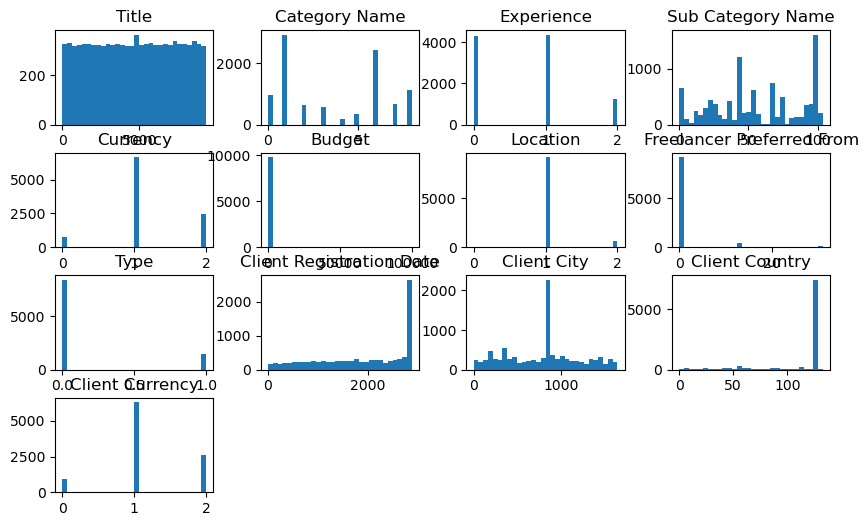

In [77]:
newdf.hist(grid=False, bins=30, figsize=(10,6))

In [102]:
newdf.agg(['skew','kurtosis']).transpose()

,skew,kurtosis
Title,-0.01,-1.20
Category Name,0.13,-1.60
Experience,0.48,-0.81
Sub Category Name,-0.05,-1.20
Currency,0.10,-0.01
Budget,45.43,2393.93
Location,2.78,11.19
Freelancer Preferred From,4.82,25.70
Type,1.98,1.94
Client Registration Date,-0.43,-1.17


# Clustering 

In [44]:
x = newdf.iloc[:, :].values
x[:5]

array([[2.981e+03, 6.000e+00, 1.000e+00, 6.800e+01, 1.000e+00, 4.000e+02,
        1.000e+00, 1.000e+00, 0.000e+00, 7.665e+03, 3.459e+03, 1.395e+03,
        8.800e+02, 1.270e+02, 1.000e+00],
       [7.174e+03, 8.000e+00, 0.000e+00, 7.100e+01, 2.000e+00, 2.000e+01,
        1.000e+00, 1.000e+00, 0.000e+00, 7.666e+03, 3.945e+03, 2.221e+03,
        1.218e+03, 1.060e+02, 2.000e+00],
       [1.700e+02, 1.000e+00, 0.000e+00, 4.000e+00, 1.000e+00, 1.000e+01,
        1.000e+00, 1.000e+00, 0.000e+00, 7.665e+03, 5.379e+03, 2.300e+02,
        3.880e+02, 1.270e+02, 1.000e+00],
       [4.808e+03, 1.000e+00, 2.000e+00, 5.200e+01, 1.000e+00, 6.500e+01,
        1.000e+00, 1.000e+00, 0.000e+00, 7.665e+03, 6.426e+03, 1.136e+03,
        4.460e+02, 1.260e+02, 2.000e+00],
       [4.488e+03, 2.000e+00, 1.000e+00, 7.400e+01, 1.000e+00, 3.000e+02,
        2.000e+00, 1.300e+01, 0.000e+00, 7.665e+03, 7.692e+03, 1.621e+03,
        8.590e+02, 1.270e+02, 1.000e+00]])

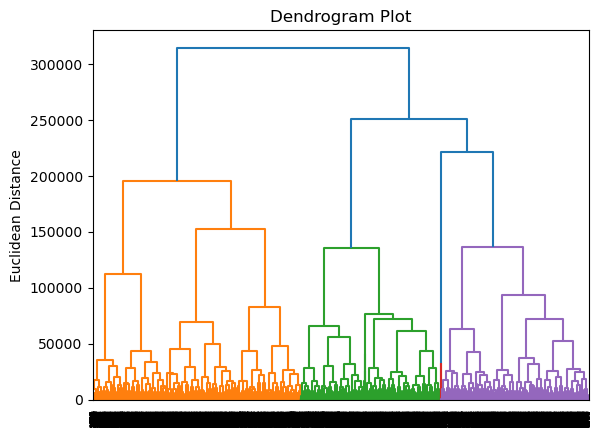

In [45]:
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage
import matplotlib.pyplot as plt

d=dendrogram(linkage (x, method='ward'))
plt.title('Dendrogram Plot')
plt.ylabel('Euclidean Distance')
plt.xlabel
plt.show()

In [46]:
from sklearn.cluster import AgglomerativeClustering

model=AgglomerativeClustering(n_clusters=5,affinity='euclidean',
                              linkage='ward')
pred = model.fit_predict(x)
pred[:5]

array([0, 0, 4, 2, 2], dtype=int64)

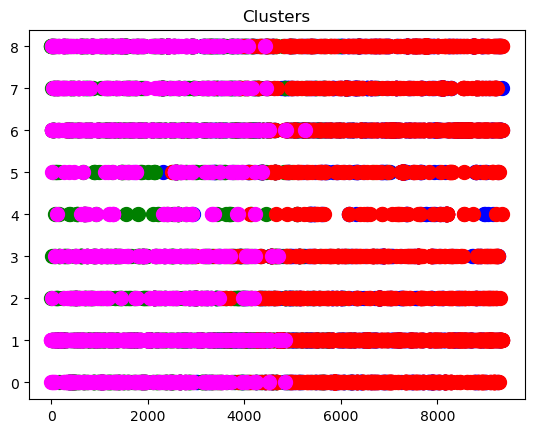

In [47]:
plt.scatter(x[pred==0,0], x[pred==0,1], s=100,
            c='blue', label='Cluster 1')
plt.scatter(x[pred==1,0], x[pred==1,1], s=100,
            c='green', label='Cluster 2')
plt.scatter(x[pred==2,0], x[pred==2,1], s=100,
            c='red', label='Cluster 3')
plt.scatter(x[pred==3,0], x[pred==3,1], s=100,
            c='cyan', label='Cluster 4')
plt.scatter(x[pred==4,0], x[pred==4,1], s=100,
            c='magenta', label='Cluster 5')
plt.title('Clusters')
plt.show()

# Regression (Linear Regression)

In [48]:
newdf.head()

,Title,Category Name,Experience,Sub Category Name,Currency,Budget,Location,Freelancer Preferred From,Type,Date Posted,Description,Client Registration Date,Client City,Client Country,Client Currency
0,2981,6,1,68,1,400.0,1,1,0,7665,3459,1395,880,127,1
1,7174,8,0,71,2,20.0,1,1,0,7666,3945,2221,1218,106,2
2,170,1,0,4,1,10.0,1,1,0,7665,5379,230,388,127,1
3,4808,1,2,52,1,65.0,1,1,0,7665,6426,1136,446,126,2
4,4488,2,1,74,1,300.0,2,13,0,7665,7692,1621,859,127,1


In [49]:
newdf.drop(columns=newdf.columns[[9,10]], axis=1, inplace=True)
newdf.head()

C:\Users\psawa\AppData\Local\Temp\ipykernel_23284\3318960300.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf.drop(columns=newdf.columns[[9,10]], axis=1, inplace=True)


,Title,Category Name,Experience,Sub Category Name,Currency,Budget,Location,Freelancer Preferred From,Type,Client Registration Date,Client City,Client Country,Client Currency
0,2981,6,1,68,1,400.0,1,1,0,1395,880,127,1
1,7174,8,0,71,2,20.0,1,1,0,2221,1218,106,2
2,170,1,0,4,1,10.0,1,1,0,230,388,127,1
3,4808,1,2,52,1,65.0,1,1,0,1136,446,126,2
4,4488,2,1,74,1,300.0,2,13,0,1621,859,127,1


In [81]:
x = newdf.iloc[:, :]
y = newdf['Budget']

In [82]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.8, random_state=5)

In [83]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(xtrain, ytrain)
model.coef_

array([ 7.62177686e-18,  1.72938942e-13,  2.95494543e-13,  3.44476539e-17,
       -3.14629340e-14,  1.00000000e+00, -3.91381252e-13,  5.65717429e-14,
        4.73550976e-15,  6.69635407e-16,  6.86689498e-18, -8.84992435e-17,
        3.93001328e-15])

In [84]:
model.intercept_

-1.7621459846850485e-12

In [85]:
pred = model.predict(xtest)
pred[:5]

array([110.,   7.,  30., 258., 275.])

In [86]:
from sklearn.metrics import r2_score

r2_score(ytest, pred)

1.0

In [87]:
from sklearn.metrics import mean_squared_error
mean_squared_error(ytest, pred)

6.894618788160674e-25

In [88]:
newdf.corr()

,Title,Category Name,Experience,Sub Category Name,Currency,Budget,Location,Freelancer Preferred From,Type,Client Registration Date,Client City,Client Country,Client Currency
Title,1.00,0.07,-0.04,0.14,0.01,-0.03,0.02,0.02,0.01,-0.04,0.01,0.01,-0.02
Category Name,0.07,1.00,-0.02,0.30,0.05,0.01,-0.06,-0.06,-0.02,-0.00,0.03,-0.08,0.04
Experience,-0.04,-0.02,1.00,0.01,-0.05,0.05,0.02,-0.00,0.03,0.08,0.04,0.02,-0.02
Sub Category Name,0.14,0.30,0.01,1.00,-0.00,0.03,-0.05,-0.07,-0.02,-0.01,0.02,-0.03,0.01
Currency,0.01,0.05,-0.05,-0.00,1.00,0.02,0.02,0.05,-0.02,0.07,0.03,-0.11,0.60
Budget,-0.03,0.01,0.05,0.03,0.02,1.00,0.01,0.03,-0.05,0.01,0.02,-0.01,0.02
Location,0.02,-0.06,0.02,-0.05,0.02,0.01,1.00,0.77,0.08,-0.05,-0.02,0.06,-0.04
Freelancer Preferred From,0.02,-0.06,-0.00,-0.07,0.05,0.03,0.77,1.00,0.09,-0.03,-0.04,0.07,-0.05
Type,0.01,-0.02,0.03,-0.02,-0.02,-0.05,0.08,0.09,1.00,0.02,-0.00,0.03,-0.02
Client Registration Date,-0.04,-0.00,0.08,-0.01,0.07,0.01,-0.05,-0.03,0.02,1.00,0.05,-0.12,0.12


<AxesSubplot:>

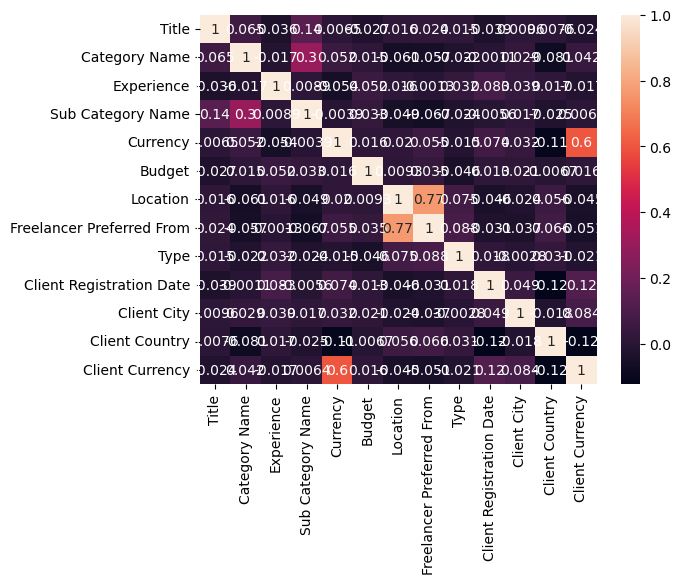

In [89]:
import seaborn as sns
sns.heatmap(newdf.corr(), annot=True)

# Classification

In [59]:
newdf.head()

,Title,Category Name,Experience,Sub Category Name,Currency,Budget,Location,Freelancer Preferred From,Type,Client Registration Date,Client City,Client Country,Client Currency
0,2981,6,1,68,1,400.0,1,1,0,1395,880,127,1
1,7174,8,0,71,2,20.0,1,1,0,2221,1218,106,2
2,170,1,0,4,1,10.0,1,1,0,230,388,127,1
3,4808,1,2,52,1,65.0,1,1,0,1136,446,126,2
4,4488,2,1,74,1,300.0,2,13,0,1621,859,127,1


In [60]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2,random_state=1)

In [61]:
!pip install lazypredict

In [62]:
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(verbose=0, 
                     ignore_warnings=True)
models, predictions = clf.fit(xtrain, xtest, 
                              ytrain, ytest)
models

100%|██████████| 29/29 [14:34<00:00, 30.15s/it]  


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LinearDiscriminantAnalysis,0.97,0.83,None,0.97,0.20
DecisionTreeClassifier,0.95,0.70,None,0.95,0.31
BaggingClassifier,0.95,0.70,None,0.95,2.02
GaussianNB,0.94,0.62,None,0.92,0.31
ExtraTreesClassifier,0.55,0.22,None,0.52,39.43
ExtraTreeClassifier,0.32,0.17,None,0.32,0.18
LabelPropagation,0.18,0.10,None,0.18,9.72
LabelSpreading,0.18,0.10,None,0.18,54.30
NearestCentroid,0.02,0.06,None,0.01,0.20


In [63]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest= train_test_split(x,y, train_size=0.8, random_state=4)

In [64]:
from sklearn.tree import DecisionTreeClassifier

model=DecisionTreeClassifier()
model.fit(xtrain, ytrain)
pred=model.predict(xtest)
pred[:5]

array([ 20.,  60.,  20., 120., 150.])

In [65]:
from sklearn.metrics import accuracy_score

accuracy_score(ytest, pred)

0.9608938547486033

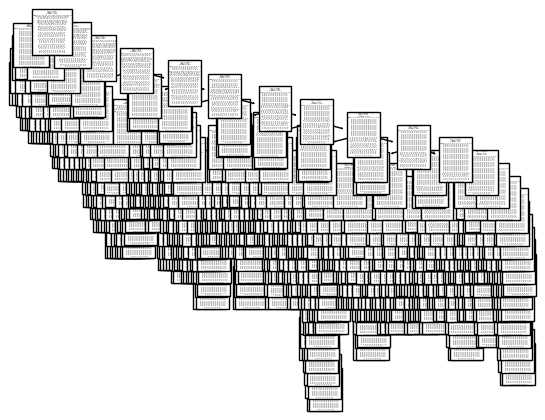

In [66]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plot_tree(model)
plt.show()

# Flask UI

In [93]:
newdf.head()

,Title,Category Name,Experience,Sub Category Name,Currency,Budget,Location,Freelancer Preferred From,Type,Client Registration Date,Client City,Client Country,Client Currency
0,2981,6,1,68,1,400.00,1,1,0,1395,880,127,1
1,7174,8,0,71,2,20.00,1,1,0,2221,1218,106,2
2,170,1,0,4,1,10.00,1,1,0,230,388,127,1
3,4808,1,2,52,1,65.00,1,1,0,1136,446,126,2
4,4488,2,1,74,1,300.00,2,13,0,1621,859,127,1


In [112]:
x = newdf.iloc[:, [5]]
y = newdf.iloc[:, [8]]

In [113]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x,y)
model.coef_

array([[-9.27139657e-06]])

In [114]:
import pickle

pickle.dump(model, open('modelprojectt.sav', 'wb'))